In [1]:
!pip install ta_py #https://pypi.org/project/ta-py/

In [2]:
import ta_py as ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Read csv

In [3]:
aapl = pd.read_csv('/content/drive/MyDrive/FYP/Stock Market Group/DataSet/AAPL/merged_file_2023-12-26.csv')
# sbux = pd.read_csv('/content/drive/MyDrive/FYP/Stock Market Group/DataSet/SBUX/SBUX_merged.csv')
# tsla = pd.read_csv('/content/drive/MyDrive/FYP/Stock Market Group/DataSet/TSLA/TSLA_merged.csv')

#Data Prepocess

- Replace Close price with Adj Close

In [4]:
def process(dataset_ex_df):
  close = dataset_ex_df["Adj Close"]
  dataset_ex_df = dataset_ex_df.drop(columns=["Close","Adj Close"])
  dataset_ex_df["Close"] = close
  dataset_ex_df['pct_change'] = (dataset_ex_df['Close'] - dataset_ex_df['Close'].shift(1))/ dataset_ex_df['Close'].shift(1)
  dataset_ex_df['log_change'] = np.log(dataset_ex_df['Close']/ dataset_ex_df['Close'].shift(1))
  # print(dataset_ex_df.head())

  return dataset_ex_df

In [5]:
aapl=process(aapl)

#Technical Indicatros

## Description



Simpe Moving Average (SMA)
```
data = [1, 2, 3, 4, 5, 6, 10];
length = 6; # default = 14
ta.sma(data, length);
```


Weighted Moving Average (WMA)
```
data = [69, 68, 66, 70, 68];
length = 4; # default = 14
ta.wma(data, length);
```



Exponential Moving Average (EMA)
```
data = [1, 2, 3, 4, 5, 6, 10];
length = 6; # default = 12
ta.ema(data, length);
```

Least Squares Moving Average (LSMA)
```
data = [5, 6, 6, 3, 4, 6, 7];
length = 6; # default = 25
ta.lsma(data, length);
```

Volume Weighted Moving Average (VWMA)
```
data = [[1, 59], [1.1, 82], [1.21, 27], [1.42, 73], [1.32, 42]]; # [price, volume (quantity)]
length = 4; # default = 20
ta.vwma(data, length);
```

Parabolic Weighted Moving Average
```
 data = [17, 26, 23, 29, 20];
 length = 4; # default = 14
ta.pwma(data, length);
```

Hyperbolic Weighted Moving Average
```
data = [54, 51, 86, 42, 47];
length = 4; # default = 14
ta.hwma(data, length);
```
Moving Average Convergence / Divergence (MACD)
```
data = [1, 2, 3, 4, 5, 6, 14];
length1 = 3; # default = 12
length2 = 6; # default = 26
ta.macd(data, length1, length2);
```

Relative Strength Index (RSI)
```
data = [1, 2, 3, 4, 5, 6, 7, 5];
length = 6; # default = 14
ta.rsi(data, length);
```

Wilder's Relative Strength Index
```
data = [1, 2, 3, 4, 5, 6, 7, 5, 6];
length = 6; # default = 14
print(ta.wrsi(data, length));
```

True Strength Index (TSI)
```
data = [1.32, 1.27, 1.42, 1.47, 1.42, 1.45, 1.59];
longlength = 3; # default = 25
shortlength = 2; # default = 13
signallength = 2; # default = 13
ta.tsi(data, longlength, shortlength, signallength);
```

Force Index
```
data = [[1.4, 200], [1.5, 240], [1.1, 300], [1.2, 240], [1.5, 400]]; # [close, volume]
length = 4; # default = 13
ta.fi(data, length);
```

Accumulative Swing Index
```
data = [[7, 6, 4], [9, 7, 5], [9, 8, 6]]; # [high, close, low]
ta.asi(data);
```
Stochastics
```
data = [[3,2,1], [2,2,1], [4,3,1], [2,2,1]]; # [high, close, low]
length = 2; # default = 14
smoothd = 1; # default = 3
smoothk = 1; # default = 3
ta.stoch(data, length, smoothd, smoothk);
```

Average True Range (ATR)
```
data = [[3,2,1], [2,2,1], [4,3,1], [2,2,1]]; # [high, close, low]
length = 3; # default = 14
ta.atr(data, length);
```

Aroon Up
```
data = [5, 4, 5, 2];
length = 3; # default = 10
ta.aroon_up(data, length);
```

Aroon Down
```
data = [2, 5, 4, 5];
length = 3; # default = 10
ta.aroon_down(data, length);
```

Rate Of Change
```
data = [1, 2, 3, 4];
length = 3; # default = 14
ta.roc(data, length);
```

Parabolic SAR
```
data = [[82.15,81.29],[81.89,80.64],[83.03,81.31],[83.30,82.65],[83.85,83.07],[83.90,83.11],[83.33,82.49],[84.30,82.3],[84.84,84.15],[85,84.11],[75.9,74.03],[76.58,75.39],[76.98,75.76],[78,77.17],[70.87,70.01]];
step = 0.02;
max = 0.2;
ta.psar(data, step, max);
```




## Code

In [7]:
def calculate_SMA(data,length=12,column="Close"):
  # Calculate SMA values
  sma = [None] * (length-1)  # Set initial 13 values to 'N/A' or any other placeholder
  sma.extend(ta.sma(data[column], length))  # Calculate SMA and append to the list

  # Add SMA values to DataFrame
  column_name = f'SMA_{length}'
  data[column_name] = sma

def calculate_WMA(data, length=12,column="Close"):
    wma = [None] * (length -1)
    wma.extend(ta.wma(data[column], length))

    column_name = f'wma_{length}'
    data[column_name] = wma


def calculate_EMA(data, length=12,column="Close"):
    ema = [None] * (length -1)
    ema.extend(ta.ema(data[column], length))

    column_name = f'ema_{length}'
    data[column_name] = ema

def calculate_LSMA(data, length=25,column ="Close"):
    lsma = [None] * (length -1)
    lsma.extend(ta.lsma(data[column], length))

    column_name = f'lsma_{length}'
    data[column_name] = lsma

def calculate_VWMA(data, length=20,column="Close"):
    array_data = data[['Close', 'Volume']].values.tolist()
    vwma = [None] * (length -1)
    vwma.extend(ta.vwma(array_data, length))

    column_name = f'vwma_{length}'
    data[column_name] = vwma

def calculate_PWMA(data, length=12,column=["Close"]):
    pwma = [None] * (length -1)
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    pwma.extend(ta.pwma(array_data, length))

    column_name = f'pwma_{length}'
    data[column_name] = pwma

def calculate_HWMA(data, length=12,column=["Close"]):
    hwma = [None] * (length -1)
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    hwma.extend(ta.hwma(array_data, length))

    column_name = f'hwma_{length}'
    data[column_name] = hwma

def calculate_MACD(data, length=12, length2=26,column=["Close"]):
    macd = [None] * (length2 -1)
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    macd.extend( ta.macd(array_data, length, length2))

    column_name = f'macd_{length}'
    data[column_name] = macd

def calculate_RSI(data, length=12,column=["Close"]):
    rsi = [None] * (length -1)
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    rsi.extend(ta.rsi(array_data, length))

    column_name = f'rsi_{length}'
    data[column_name] = rsi

def calculate_Wilder_RSI(data, length=12,column=["Close"]):
    wrsi = [None] * (length)
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    wrsi.extend(ta.wrsi(array_data, length))


    column_name = f'wrsi_{length}'
    data[column_name] = wrsi

def calculate_TSI(data, longlength=25, shortlength=13, signallength=13,column=["Close"]):
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    tsi = ta.tsi(array_data, longlength, shortlength, signallength)
    # Extracting the strength line and signal line arrays
    strength_line = [row[0] for row in tsi]
    signal_line = [row[1] for row in tsi]

    # Padding with None values to match DataFrame length
    padding_length = len(data[column]) - len(strength_line)
    data['strength_line'] = [None] * padding_length + strength_line
    data['signal_line'] = [None] * padding_length + signal_line

def calculate_Force_Index(data, length=12):
    array_data = data[['Close', 'Volume']].values.tolist()
    fi = ta.fi(array_data, length)

    column_name = f'fi_{length}'
    data[column_name] =[None] * (len(data['Close'])-len(fi))+ fi

def calculate_ASI(data):
    array_data = data[['High', 'Close','Low']].values.tolist()
    asi=ta.asi(array_data)

    data['asi'] = asi


def calculate_Stochastics(data, length=12, smoothd=3, smoothk=3,column="Close"):
    array_data = data[['High', 'Close','Low']].values.tolist()
    stoch = ta.stoch(array_data, length, smoothd, smoothk)

    # Extracting the strength line and signal line arrays
    kline = [row[0] for row in stoch]
    dline = [row[1] for row in stoch]

    # Padding with None values to match DataFrame length
    padding_length = len(data[column]) - len(kline)
    data['kline'] = [None] * padding_length + kline
    data['dline'] = [None] * padding_length + dline

def calculate_ATR(data, length=12):
    array_data = data[['High', 'Close','Low']].values.tolist()
    atr = ta.atr(array_data, length)

    column_name = f'atr_{length}'
    data[column_name] =[None] * (len(data['Close'])-len(atr))+ atr

def calculate_Aroon_Up(data, length=10,column=["Close"]):
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    aroon_up = ta.aroon_up(array_data, length)

    data['aroon_up'] =[None] * (len(data['Close'])-len(aroon_up))+ aroon_up

def calculate_Aroon_Down(data, length=10,column=["Close"]):
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    aroon_down = ta.aroon_down(array_data, length)

    data['aroon_down'] =[None] * (len(data['Close'])-len(aroon_down))+ aroon_down

def calculate_ROC(data, length=12,column=["Close"]):
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    roc = ta.roc(array_data, length)

    column_name = f'roc_{length}'
    data[column_name] =[None] * (len(data['Close'])-len(roc))+ roc

def calculate_PSAR(data, step=0.02, max=0.2):
    array_data = data[['High','Low']].values.tolist()
    psar=ta.psar(array_data, step, max)

    data['psar'] = psar

def calculate_BB(data, length=12, column="Close"):
    output_array = np.array(ta.bands(data[column], length, 2))
    # Pre-initialize arrays with NaN for the first length-1 entries
    nan_array = np.full((length - 1,), np.nan)

    # Extracting the bands and concatenate NaNs at the start
    upper_band = np.concatenate((nan_array, output_array[:, 0]))  # All rows, first column
    middle_band = np.concatenate((nan_array, output_array[:, 1]))  # All rows, second column
    lower_band = np.concatenate((nan_array, output_array[:, 2]))

    Upperband_name = f'Upperband_{length}'
    Lowerband_name = f'Lowerband_{length}'
    data[Upperband_name] = upper_band
    data[Lowerband_name] = lower_band

def calculate_MOM(data, length = 10, column="Close"):
  # Momentum
  nan_array = np.full((length - 1,), np.nan)
  data["MOM10"] = np.concatenate((nan_array, ta.mom(data[column], length)))


def calculate_OBV(data, length = 10, column="Close"):
  combined_array = data[['Volume', 'Close']].to_numpy()
  # Volume Indicators
  data["OBV"] = ta.obv(combined_array)

def calculate_VWAP(data,length=12,column="Close"):
  combined_array = data[['Close', 'Volume']].to_numpy()
  #Volume-Weighted Average Price
  nan_array = np.full((length - 1,), np.nan)
  data["VWAP"] = np.concatenate((nan_array, ta.vwap(combined_array,length)))



#Calculate Indicators

In [8]:
def calculate(stock):
  calculate_SMA(stock,length=3)
  # calculate_SMA(stock,length=6)
  calculate_SMA(stock,length=12)
  calculate_SMA(stock,length=20)
  calculate_SMA(stock,length=48)
  calculate_SMA(stock,length=50)
  # calculate_SMA(stock,length=72)#
  calculate_SMA(stock,length=288)


  calculate_WMA(stock,length=12)
  # calculate_WMA(stock,length=48)
  # calculate_WMA(stock,length=72)

  calculate_EMA(stock,length=12)
  calculate_EMA(stock,length=20)
  calculate_EMA(stock,length=26)
  # calculate_EMA(stock,length=48)#
  # calculate_EMA(stock,length=72)#

  calculate_LSMA(stock)
  calculate_VWMA(stock)
  calculate_PWMA(stock)
  calculate_HWMA(stock)

  calculate_MACD(stock,length=12)
  calculate_MACD(stock,length=24)

  calculate_RSI(stock,length=12)
  calculate_RSI(stock,length=24)
  calculate_RSI(stock,length=36)
  # calculate_RSI(stock,length=72)#

  calculate_Wilder_RSI(stock)
  calculate_TSI(stock)

  calculate_Force_Index(stock,length=12)
  # calculate_Force_Index(stock,length=24)
  # calculate_Force_Index(stock,length=48)

  calculate_Stochastics(stock)

  calculate_ATR(stock,length=12)
  calculate_ATR(stock,length=24)
  calculate_ATR(stock,length=36)
  # calculate_ATR(stock,length=48)#

  calculate_Aroon_Up(stock)
  calculate_Aroon_Down(stock)
  calculate_ROC(stock)
  calculate_PSAR(stock)

  calculate_BB(stock,length=12)
  calculate_BB(stock,length=24)
  calculate_BB(stock,length=36)
  # calculate_BB(stock,length=72)

  calculate_MOM(stock)
  calculate_OBV(stock)
  # calculate_VWAP(stock)


# Fourier Values

In [9]:
def calculate_fourier(dataset_Idc):
  close_fft = np.fft.fft(np.asarray(dataset_Idc['Close'].tolist()))
  fft_df = pd.DataFrame({'fft':close_fft})
  fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
  fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
  output_df_fft = fft_df.copy()

  fft_list = np.asarray(fft_df['fft'].tolist())
  for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list)
    fft_list_m10[num_:-num_]=0
    output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))

  return output_df_fft

# Features with Variational AutoEncorder

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [11]:
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )

        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        )

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

In [12]:
def calculate_VAE(stock):
  data = stock.iloc[:,1:]
  features = data.shape[1]

  data['y'] = data['Close']

  x = data.iloc[:, :features].values
  y = data.iloc[:, features].values

  split = int(data.shape[0]* 0.5)
  train_x, test_x = x[: split, :], x[split:, :]
  train_y, test_y = y[: split, ], y[split: , ]

  print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
  print(f'testX: {test_x.shape} testY: {test_y.shape}')


  x_scaler = MinMaxScaler(feature_range = (0, 1))
  y_scaler = MinMaxScaler(feature_range = (0, 1))

  train_x = x_scaler.fit_transform(train_x)
  test_x = x_scaler.transform(test_x)

  train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
  test_y = y_scaler.transform(test_y.reshape(-1, 1))

  train_loader = DataLoader(TensorDataset(torch.from_numpy(train_x).float()), batch_size = 128, shuffle = False)
  model = VAE([features, 400, 400, 400, 10], 10)


  use_cuda = 1
  device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")




  num_epochs = 200
  learning_rate = 0.00003
  model = model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

  hist = np.zeros(num_epochs)
  for epoch in range(num_epochs):
      total_loss = 0
      loss_ = []
      for (x, ) in train_loader:
          x = x.to(device)
          output, z, mu, logVar = model(x)
          kl_divergence = 0.5* torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
          loss = F.binary_cross_entropy(output, x) + kl_divergence
          loss.backward()
          optimizer.step()
          loss_.append(loss.item())
      hist[epoch] = sum(loss_)
      print('[{}/{}] Loss:'.format(epoch+1, num_epochs), sum(loss_))

  plt.figure(figsize=(12, 6))
  plt.plot(hist)





  model.eval()
  _, VAE_train_x, train_x_mu, train_x_var = model(torch.from_numpy(train_x).float().to(device))
  _, VAE_test_x, test_x_mu, test_x_var = model(torch.from_numpy(test_x).float().to(device))
  print(train_x_mu.shape)
  print(test_x_mu.shape)

  df_tr = pd.DataFrame(VAE_train_x.detach().numpy(), columns=['enc1', 'enc2', 'enc3','enc4', 'enc5', 'enc6','enc7', 'enc8', 'enc9','enc10'])
  df_ts = pd.DataFrame(VAE_test_x.detach().numpy(), columns=['enc1', 'enc2', 'enc3','enc4', 'enc5', 'enc6','enc7', 'enc8', 'enc9','enc10'])
  df_ts.index += train_x.shape[0]

  df_vae = pd.concat([df_tr, df_ts], axis=0)

  return df_vae




#Save File

In [13]:
def saveFile(stock,name):
  feature_df= pd.DataFrame(stock)
  filename = f'/content/drive/MyDrive/FYP/Stock Market Group/Final Codes/DataSets/{name}_data_with_indicators.csv'
  feature_df.to_csv(filename,index=False)


In [ ]:
#Plot Close Price over time
# def plotDataset(data,x_label, y_label1,y_label2,y_name):
#   plt.figure(figsize=(14, 5), dpi=100)
#   plt.plot(data[x_label], data[y_label1], label='AAPL-USD')
#   # plt.plot(data[x_label], y_label2, label=y_name)
#   plt.xlabel('Date')
#   plt.ylabel('USD')
#   # plt.title('Figure 2: ETH-USDT price')
#   plt.legend()
#   plt.show()

# output = aapl
# plotDataset(aapl,"Datetime","Close",output,"SMA-9000")

# Calculation

<ipython-input-9-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-9-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-9-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/_

trainX: (5980, 53) trainY: (5980,)
testX: (5981, 53) testY: (5981,)
[1/200] Loss: 1338.0094757080078
[2/200] Loss: 1251.3334617614746
[3/200] Loss: 992.7618141174316
[4/200] Loss: 1018.619161605835
[5/200] Loss: 931.3471908569336
[6/200] Loss: 881.8602895736694
[7/200] Loss: 855.8122882843018
[8/200] Loss: 805.3512535095215
[9/200] Loss: 740.4302940368652
[10/200] Loss: 727.6030445098877
[11/200] Loss: 674.3860321044922
[12/200] Loss: 665.3231906890869
[13/200] Loss: 604.0326118469238
[14/200] Loss: 597.5164804458618
[15/200] Loss: 536.9449615478516
[16/200] Loss: 521.4460468292236
[17/200] Loss: 519.1084318161011
[18/200] Loss: 467.228964805603
[19/200] Loss: 442.43096590042114
[20/200] Loss: 451.37183713912964
[21/200] Loss: 384.14761543273926
[22/200] Loss: 376.42763233184814
[23/200] Loss: 382.1967158317566
[24/200] Loss: 360.0789461135864
[25/200] Loss: 320.92178297042847
[26/200] Loss: 303.70853757858276
[27/200] Loss: 315.799870967865
[28/200] Loss: 287.532124042511
[29/200] Los

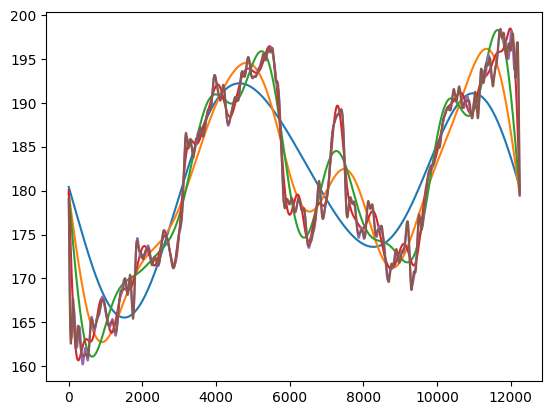

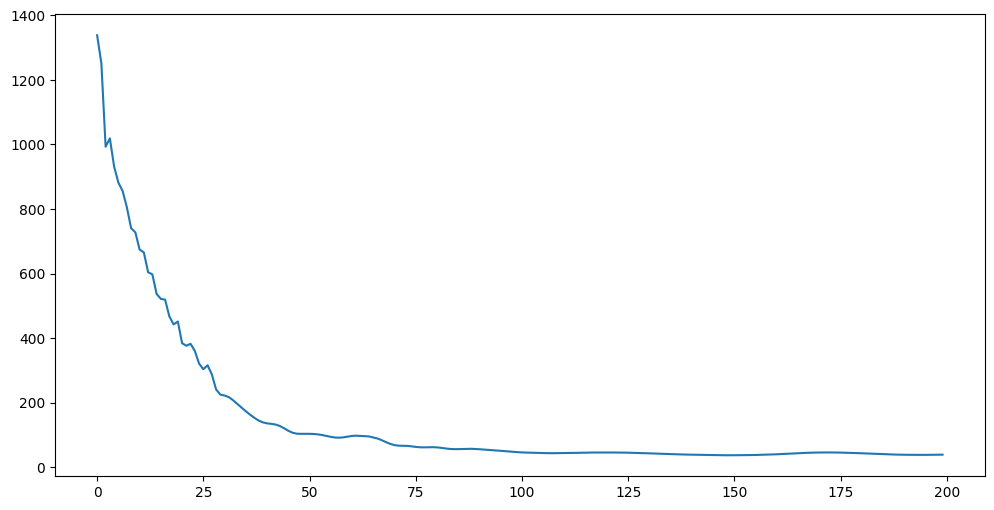

In [14]:
calculate(aapl)
output_df_fft = calculate_fourier(aapl)
aapl =  pd.concat([aapl,output_df_fft[["FT_3components",	"FT_6components",	"FT_9components",	"FT_27components",	"FT_81components",	"FT_100components"]]], axis=1)


aapl = aapl.dropna()
aapl = aapl.reset_index()
aapl = aapl.drop(columns=["index"])

df_vae = calculate_VAE(aapl)
aapl = pd.concat([aapl, df_vae], axis=1)

aapl = aapl.dropna()
aapl = aapl.reset_index()
aapl = aapl.drop(columns=["index"])

In [15]:
aapl

,Datetime,Open,High,Low,Volume,Close,pct_change,log_change,SMA_3,SMA_12,...,enc1,enc2,enc3,enc4,enc5,enc6,enc7,enc8,enc9,enc10
0,2023-04-06 17:55:00,164.698807,164.809998,164.615005,349318,164.809998,0.000729,0.000728,164.716665,164.526864,...,0.045685,-0.070123,-1.338229,-0.729456,0.794316,1.151359,-1.031899,1.440403,0.564927,2.067871
1,2023-04-06 18:00:00,164.809998,164.869995,164.554993,421239,164.610001,-0.001214,-0.001214,164.703334,164.542698,...,-1.917372,-0.560213,0.568260,0.097598,-2.624734,-0.691774,2.950038,0.111201,-0.399160,-1.183966
2,2023-04-06 18:05:00,164.604996,164.830002,164.600006,284448,164.750000,0.000850,0.000850,164.723333,164.562689,...,0.318468,-1.134426,-0.102192,0.155614,-0.077268,0.901655,-0.202376,-0.614506,2.503315,0.491503
3,2023-04-06 18:10:00,164.750000,164.839996,164.709900,218784,164.800003,0.000304,0.000303,164.720001,164.595198,...,-0.170538,0.169923,-1.456454,-0.055652,0.090310,-0.900503,0.749317,0.362166,0.162497,3.487168
4,2023-04-06 18:15:00,164.797699,164.850006,164.679993,252622,164.779999,-0.000121,-0.000121,164.776667,164.626865,...,-2.661372,1.334679,-0.405180,-0.328983,0.363982,0.254260,0.791689,0.912229,0.844108,-0.312296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11956,2023-12-22 20:35:00,193.835007,193.845001,193.690002,416732,193.699997,-0.000722,-0.000723,193.839996,193.769932,...,-0.208948,0.133853,0.532770,-0.814283,-1.191346,-0.462139,0.881740,0.751192,-0.896305,1.047823
11957,2023-12-22 20:40:00,193.708298,193.720001,193.574997,401940,193.654999,-0.000232,-0.000232,193.731664,193.770765,...,1.143185,1.530130,-2.095343,-1.650728,-0.200893,0.686483,-0.813496,-1.455742,0.782098,-2.430693
11958,2023-12-22 20:45:00,193.654999,193.820007,193.570007,498217,193.595001,-0.000310,-0.000310,193.649999,193.757015,...,2.910005,1.430809,0.728621,1.191671,-0.223638,0.238159,-1.791434,0.742552,-0.233358,-0.989324
11959,2023-12-22 20:50:00,193.589996,193.800003,193.544998,867752,193.625000,0.000155,0.000155,193.625000,193.742016,...,-0.556704,-1.096826,-0.128536,-1.146046,1.841329,-0.734095,0.160785,0.702892,0.632077,0.439248


In [16]:
saveFile(aapl,"AAPL_past")

# PCA Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df_pca=aapl.drop(['Datetime'], axis=1)

In [ ]:
X = df_pca.values # matrix of dataframe
sc = StandardScaler()
X_std = sc.fit_transform(X) # standardizing the data

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_std) # fit and reduce dimensions
print(pca.n_components_)

75


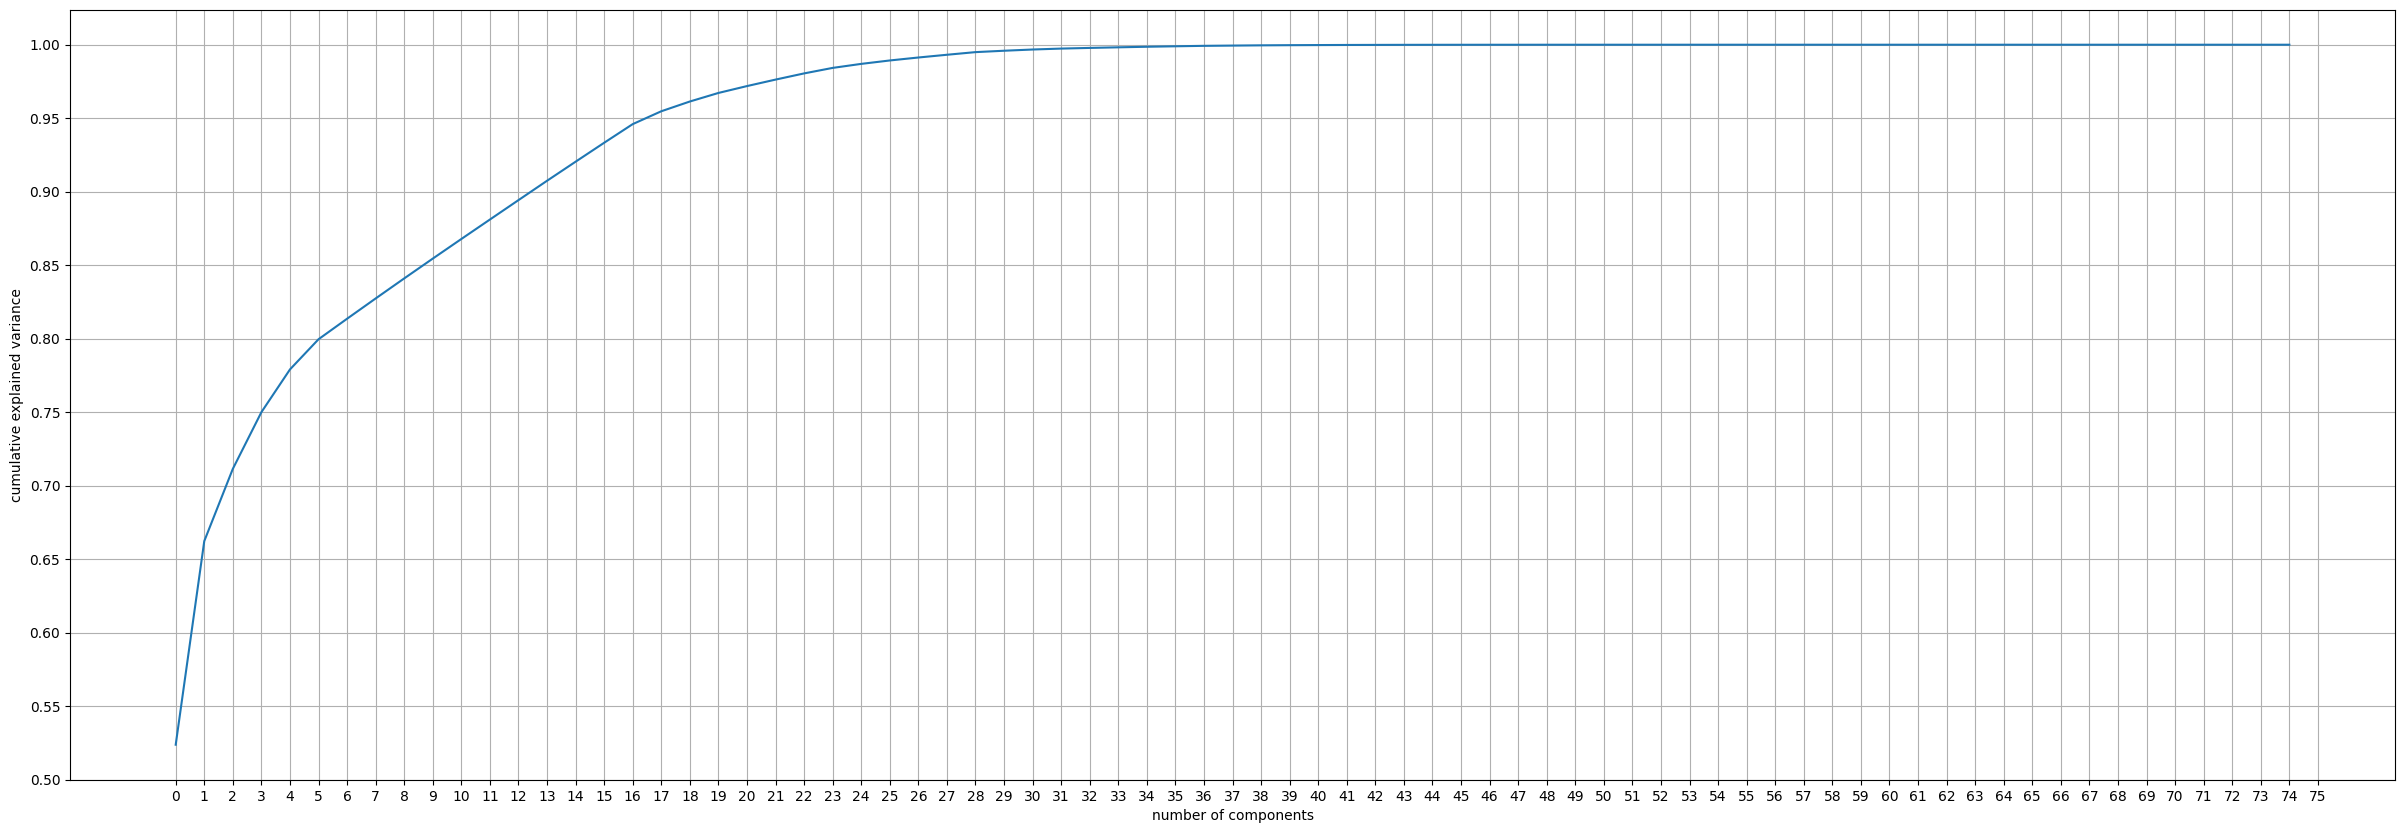

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, df_pca.shape[1]+1, 1.0))
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [ ]:
n_pcs= pca.n_components_ # get number of component

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df_pca.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
x=1
for i in most_important_names:
  print(x,i,end="\n")
  x+=1

1 ema_26
2 wrsi_12
3 atr_24
4 wma_24
5 log_change
6 pct_change
7 enc3
8 enc6
9 enc7
10 enc1
11 enc8
12 enc7
13 enc2
14 Volume
15 enc3
16 enc6
17 enc1
18 fi_48
19 rsi_72
20 aroon_down
21 FT_3components
22 FT_3components
23 atr_12
24 fi_12
25 fi_24
26 rsi_12
27 rsi_12
28 OBV
29 rsi_36
30 FT_9components
31 dline
32 roc_12
33 kline
34 Upperband_72
35 SMA_288
36 FT_6components
37 wrsi_12
38 atr_24
39 FT_27components
40 signal_line
41 FT_81components
42 Upperband_24
43 Upperband_48
44 wma_12
45 Upperband_12
46 psar
47 FT_100components
48 Open
49 atr_48
50 Lowerband_72
51 vwma_20
52 ema_72
53 VWAP
54 High
55 High
56 pct_change
57 lsma_25
58 Open
59 SMA_6
60 VWAP
61 Close
62 ema_72
63 hwma_12
64 SMA_50
65 SMA_20
66 SMA_20
67 wma_72
68 wma_48
69 ema_48
70 hwma_12
71 ema_20
72 SMA_12
73 SMA_48
74 SMA_72
75 ema_12


In [ ]:
num_components = 22
pca = PCA(num_components)
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [ ]:
df_PCA=X_pca.copy()
df_PCA = pd.DataFrame(df_PCA,columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9","pca10","pca11","pca12","pca13","pca14","pca15","pca16","pca17","pca18","pca19","pca20","pca21","pca22"])
df_PCA.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22
0,10.362697,-2.859580,-1.344552,-1.151696,0.310272,0.520656,-0.460350,-0.565028,0.028829,0.632887,...,-0.911707,0.620431,0.840599,0.868619,-0.553995,-0.382518,0.225558,-0.816575,-0.801123,0.639585
1,10.370139,-1.522603,-1.655869,-0.042706,1.377797,-0.520075,-1.035191,-0.794544,-1.085820,-1.616816,...,-0.486426,0.848341,0.463114,-0.762950,-1.355996,-0.230070,0.406030,-0.403812,-1.278288,0.383091
2,10.358724,-2.487793,-1.311036,-1.012836,0.241543,0.670467,-0.343912,-0.169061,0.432046,-2.149314,...,0.030013,-1.104947,1.207370,0.121486,0.475501,-0.355716,0.191870,-0.055027,-1.051320,0.501357
3,10.346232,-2.669349,-1.397562,-1.079788,0.478731,0.141245,0.212568,-1.997539,0.105714,-1.241042,...,-1.024613,0.431383,-1.376167,1.174551,-0.160868,-0.265169,0.189940,0.322010,-0.865001,0.551277
4,10.340493,-2.526050,-1.528842,-0.901107,0.732561,-0.101299,0.167835,-1.866088,-1.771321,0.043755,...,0.001792,-0.414325,-0.993400,0.835887,-0.240190,-0.263573,0.128185,0.569264,-0.680480,0.624910
